## Figures for Sample Reach

In [39]:
## Load participant 7 (will be our sample)
import numpy as np

participantNumber = 10

endOfFileName = "_" + str(participantNumber) + ".npy"
resultsNF1 = np.load("save_NF1/cartesian_position" + endOfFileName)
targetsNF1 = np.load("save_NF1/targets" + endOfFileName)
resultsCF1 = np.load("save_CF1/cartesian_position" + endOfFileName)
targetsCF1 = np.load("save_CF1/targets" + endOfFileName)
resultsNF2 = np.load("save_NF2/cartesian_position" + endOfFileName)
targetsNF2 = np.load("save_NF2/targets" + endOfFileName)
resultsCF2 = np.load("save_CF2/cartesian_position" + endOfFileName)
targetsCF2 = np.load("save_CF2/targets" + endOfFileName)

In [40]:
## convert to cm

print(len(resultsNF1[:, 0, 0]))

for i in range(len(resultsNF1[:, 0, 0])):
    resultsNF1[i, :, 0:2] = (resultsNF1[i, :, 0:2])*100
    resultsCF1[i, :, 0:2] = (resultsCF1[i, :, 0:2])*100
    resultsNF2[i, :, 0:2] = (resultsNF2[i, :, 0:2])*100
    resultsCF2[i, :, 0:2] = (resultsCF2[i, :, 0:2])*100

    targetsNF1[i, :, 0:2] = (targetsNF1[i, :, 0:2])*100
    targetsCF1[i, :, 0:2] = (targetsCF1[i, :, 0:2])*100
    targetsNF2[i, :, 0:2] = (targetsNF2[i, :, 0:2])*100
    targetsCF2[i, :, 0:2] = (targetsCF2[i, :, 0:2])*100


#newResultsNF1 = (resultsNF1[0, :, 0:2])*100

400


In [43]:
import matplotlib.pyplot as plt

def plotReaches(xy, target_xy, title):
    plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
    target_x = (target_xy[:, -1, 0])
    target_y = (target_xy[:, -1, 1])
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=0.5) ## target straight line reach
        plt.plot((xy[i,:,0]),(xy[i,:,1]),color="#4F2683",linewidth=1.0) ## actual reach
    plt.scatter(target_x, target_y)
    plt.axis([-15, 15, 30, 60])
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.title(title)
    saveLocation = "figures/" + title + ".png"
    plt.savefig(saveLocation)


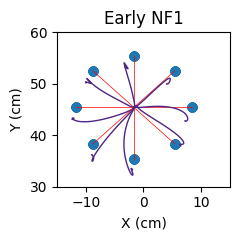

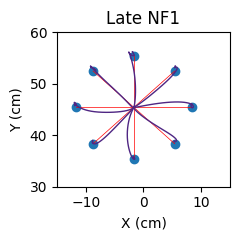

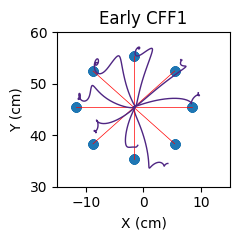

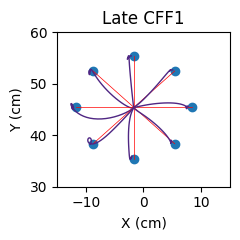

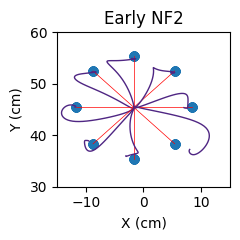

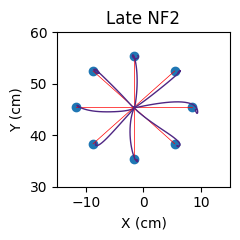

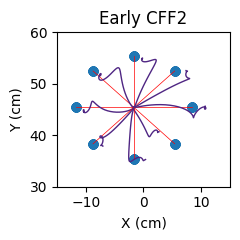

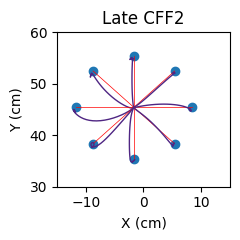

In [44]:
## NF1
plotReaches(resultsNF1[7:, :, :], targetsNF1[7:, :, :], "Early NF1")
plotReaches(resultsNF1[-8:, :, :], targetsNF1[-8:, :, :], "Late NF1")

## CF1
plotReaches(resultsCF1[7:, :, :], targetsCF1[7:, :, :], "Early CFF1")
plotReaches(resultsCF1[-8:, :, :], targetsCF1[-8:, :, :], "Late CFF1")

## NF2
plotReaches(resultsNF2[7:, :, :], targetsNF2[7:, :, :], "Early NF2")
plotReaches(resultsNF2[-8:, :, :], targetsNF2[-8:, :, :], "Late NF2")

## CF2
plotReaches(resultsCF2[7:, :, :], targetsCF2[7:, :, :], "Early CFF2")
plotReaches(resultsCF2[-8:, :, :], targetsCF2[-8:, :, :], "Late CFF2")

## Figures for max deviation

In [48]:
import numpy as np

maxNF1 = np.load("postAnalysis/maxNF1.npy")
maxCF1 = np.load("postAnalysis/maxCF1.npy")
maxNF2 = np.load("postAnalysis/maxNF2.npy")
maxCF2 = np.load("postAnalysis/maxCF2.npy")

# convert to cm

for i in range(len(maxNF1[:, 0])):
    maxNF1[i, :] = (maxNF1[i,:]*100)
    maxCF1[i, :] = (maxCF1[i,:]*100)
    maxNF2[i, :] = (maxNF2[i,:]*100)
    maxCF2[i, :] = (maxCF2[i,:]*100)

In [56]:
from scipy.optimize import curve_fit

def printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation):

    initialGuess = [0.03, 0.01, 0.01]

    plt.figure(figsize=(10, 2.3)).set_tight_layout(True)

    plt.subplot(141)
    plt.scatter(range(len(currMaxNF1)), currMaxNF1, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxNF1), len(currMaxNF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('NF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(142)
    plt.scatter(range(len(currMaxCF1)), currMaxCF1, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxCF1), len(currMaxCF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('CFF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(143)
    plt.scatter(range(len(currMaxNF2)), currMaxNF2, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxNF2), len(currMaxNF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('NF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(144)
    plt.scatter(range(len(currMaxCF2)), currMaxCF2, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxCF2), len(currMaxCF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('CFF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.savefig(saveLocation)

/tmp/ipykernel_1126450/3480795459.py:7: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b


[2.54690004 0.02465475 0.94048638]
[2.83948731 0.01177493 0.96922537]
[2.56354112 0.01260607 0.78474166]
[2.48185759 0.01032589 0.88230224]


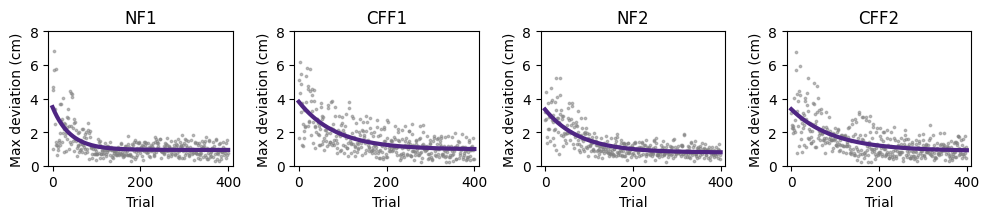

In [57]:
currMaxNF1 = maxNF1[7, :]
currMaxCF1 = maxCF1[7, :]
currMaxNF2 = maxNF2[7, :]
currMaxCF2 = maxCF2[7, :]

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

saveLocation = "figures/maxDeviationCurves7"

printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation)

## Figures for average learning curves

In [ ]:
import numpy as np

maxNF1 = np.load("postAnalysis/maxNF1.npy")
maxCF1 = np.load("postAnalysis/maxCF1.npy")
maxNF2 = np.load("postAnalysis/maxNF2.npy")
maxCF2 = np.load("postAnalysis/maxCF2.npy")

# convert to cm

for i in range(len(maxNF1[:, 0])):
    maxNF1[i, :] = (maxNF1[i,:]*100)
    maxCF1[i, :] = (maxCF1[i,:]*100)
    maxNF2[i, :] = (maxNF2[i,:]*100)
    maxCF2[i, :] = (maxCF2[i,:]*100)

In [69]:
avgMaxNF1 = np.mean(maxNF1, axis=0)
avgMaxCF1 = np.mean(maxCF1, axis=0)
avgMaxNF2 = np.mean(maxNF2, axis=0)
avgMaxCF2 = np.mean(maxCF2, axis=0)

/tmp/ipykernel_1126450/1329368118.py:2: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b
/tmp/ipykernel_1126450/1329368118.py:2: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(-t * x) + b


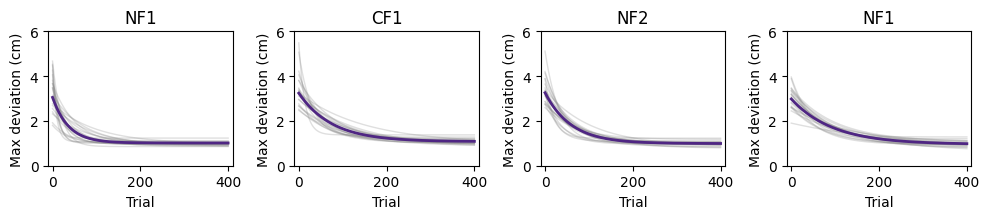

In [73]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

initialGuess = [3, 1, 1]

plt.figure(figsize=(10, 2.3)).set_tight_layout(True)

plt.subplot(141, title="NF1", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxNF1[:,0])):
    currMax = maxNF1[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxNF1
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(142, title="CF1", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxCF1[:,0])):
    currMax = maxCF1[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxCF1
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(143, title="NF2", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxNF2[:,0])):
    currMax = maxNF2[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxNF2
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(144, title="NF1", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxCF2[:,0])):
    currMax = maxCF2[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxCF2
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.savefig("figures/maxDeviationLearningCurves")


## Figures for comparing first 2.5% (initial performance)

In [77]:
# extract first 5% for each curve
import numpy as np

initialMaxNF1 = maxNF1[:, 0:10]
initialMaxCF1 = maxCF1[:, 0:10]
initialMaxNF2 = maxNF2[:, 0:10]
initialMaxCF2 = maxCF2[:, 0:10]

initialPerParticipantNF1 = np.mean(initialMaxNF1, axis=1) ## switch to axis 1
initialPerParticipantCF1 = np.mean(initialMaxCF1, axis=1)
initialPerParticipantNF2 = np.mean(initialMaxNF2, axis=1)
initialPerParticipantCF2 = np.mean(initialMaxCF2, axis=1)

# avgMaxNF1 = np.mean(initialMaxNF1) # averaging the first 20 trials for each participant, and averaging all participants
# avgMaxCF1 = np.mean(initialMaxCF1) 
# avgMaxNF2 = np.mean(initialMaxNF2) 
# avgMaxCF2 = np.mean(initialMaxCF2) 

avgMaxNF1 = np.mean(initialPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgMaxCF1 = np.mean(initialPerParticipantCF1) 
avgMaxNF2 = np.mean(initialPerParticipantNF2) 
avgMaxCF2 = np.mean(initialPerParticipantCF2) 


In [78]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(initialPerParticipantNF1, initialPerParticipantNF2)
print("NF T Statistic: ", t_statistic) # -2.41
print("NF P value: ", p_value) # 0.026
# there is a significant difference in initial performance between NF1 and NF2 (p < 0.05)


t_statistic, p_value = ttest_rel(initialPerParticipantCF1, initialPerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # 3.26
print("CFF P value: ", p_value) # 0.0041
# there is a significant difference between CF1 and CF2 (p < 0.01)

NF T Statistic:  -0.707371543533694
NF P value:  0.4879221051942063
CFF T Statistic:  0.9853502396781895
CFF P value:  0.33683450338667853


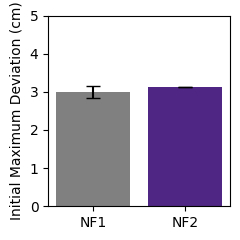

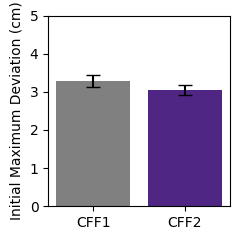

In [92]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgMaxNF1, avgMaxNF2]
yerror = [(np.std(initialPerParticipantNF1)/np.sqrt(np.size(initialPerParticipantNF1))), (np.std(initialPerParticipantNF2)//np.sqrt(np.size(initialPerParticipantNF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Initial Maximum Deviation (cm)")
plt.ylim([0, 5])
plt.savefig("figures/initialNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CFF1', 'CFF2']
y_axis = [avgMaxCF1, avgMaxCF2]
yerror = [(np.std(initialPerParticipantCF1)/np.sqrt(np.size(initialPerParticipantCF1))), (np.std(initialPerParticipantCF2)/np.sqrt(np.size(initialPerParticipantCF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Initial Maximum Deviation (cm)")
plt.ylim([0, 5])
plt.savefig("figures/initialCFFbar")

## Figures for comparing learning rate

In [87]:
parametersPerParticipantNF1 = np.load("postAnalysis/funcParametersNF1.npy")
parametersPerParticipantCF1 = np.load("postAnalysis/funcParametersCF1.npy")
parametersPerParticipantNF2 = np.load("postAnalysis/funcParametersNF2.npy")
parametersPerParticipantCF2 = np.load("postAnalysis/funcParametersCF2.npy")

ratePerParticipantNF1 = (parametersPerParticipantNF1[1:,1]*100)
ratePerParticipantCF1 = (parametersPerParticipantCF1[1:, 1]*100)
ratePerParticipantNF2 = (parametersPerParticipantNF2[1:, 1]*100)
ratePerParticipantCF2 = (parametersPerParticipantCF2[1:, 1]*100)

avgRateNF1 = np.mean(ratePerParticipantNF1)
avgRateCF1 = np.mean(ratePerParticipantCF1)
avgRateNF2 = np.mean(ratePerParticipantNF2)
avgRateCF2 = np.mean(ratePerParticipantCF2)

In [88]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(ratePerParticipantNF1, ratePerParticipantNF2)
print("NF T Statistic: ", t_statistic) # 2.81
print("NF P value: ", p_value) # 0.011
# there is a significant difference in rate of learning between NF1 and NF2 (p < 0.05)

t_statistic, p_value = ttest_rel(ratePerParticipantCF1, ratePerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # -0.67
print("CFF P value: ", p_value) # 0.51
# there is no significant difference in rate of learning between CF1 and CF2 (p > 0.05)

NF T Statistic:  2.8069488818566244
NF P value:  0.011251992790049757
CFF T Statistic:  -0.6732145354997672
CFF P value:  0.508917495823842


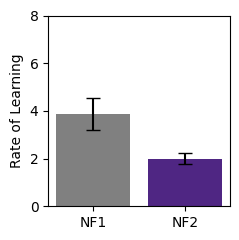

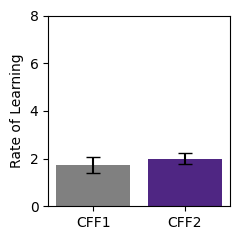

In [90]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgRateNF1, avgRateNF2]
yerror = [(np.std(ratePerParticipantNF1)/np.sqrt(np.size(ratePerParticipantNF1))), (np.std(ratePerParticipantNF2)/np.sqrt(np.size(ratePerParticipantNF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Rate of Learning")
plt.ylim([0, 8])
plt.savefig("figures/rateNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CFF1', 'CFF2']
y_axis = [avgRateCF1, avgRateCF2]
yerror = [(np.std(ratePerParticipantCF1)/np.sqrt(np.size(ratePerParticipantCF1))), (np.std(ratePerParticipantCF2)/np.sqrt(np.size(ratePerParticipantCF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Rate of Learning")
plt.ylim([0, 8])
plt.savefig("figures/rateCFFbar")

## Figures for comparing final asymptotic deviation (final 2.5%)

In [96]:
# extract first 5% for each curve
import numpy as np

finalMaxNF1 = maxNF1[:, -10:]
finalMaxCF1 = maxCF1[:, -10:]
finalMaxNF2 = maxNF2[:, -10:]
finalMaxCF2 = maxCF2[:, -10:]

finalPerParticipantNF1 = np.mean(finalMaxNF1, axis=1)
finalPerParticipantCF1 = np.mean(finalMaxCF1, axis=1)
finalPerParticipantNF2 = np.mean(finalMaxNF2, axis=1)
finalPerParticipantCF2 = np.mean(finalMaxCF2, axis=1)

avgMaxNF1 = np.mean(finalPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgMaxCF1 = np.mean(finalPerParticipantCF1) 
avgMaxNF2 = np.mean(finalPerParticipantNF2) 
avgMaxCF2 = np.mean(finalPerParticipantCF2) 

In [97]:
# test significance
from scipy.stats import ttest_rel

t_statistic, p_value = ttest_rel(finalPerParticipantNF1, finalPerParticipantNF2)
print("NF T Statistic: ", t_statistic) # 0.42
print("NF P value: ", p_value) # 0.68
# there is no significant difference in initial performance between NF1 and NF2 (p > 0.05)


t_statistic, p_value = ttest_rel(finalPerParticipantCF1, finalPerParticipantCF2)
print("CFF T Statistic: ",t_statistic) # 2.85
print("CFF P value: ", p_value) # 0.01
# there is a significant difference between CF1 and CF2 (p < 0.05)

NF T Statistic:  0.4683181168195974
NF P value:  0.6448849892259327
CFF T Statistic:  0.7227468785274138
CFF P value:  0.4786383685903599


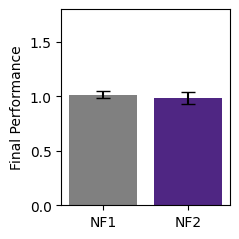

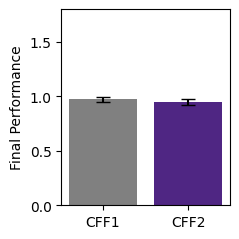

In [101]:
import matplotlib.pyplot as plt

colors = ["grey", "#4F2683"]

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['NF1', 'NF2']
y_axis = [avgMaxNF1, avgMaxNF2]
yerror = [(np.std(finalPerParticipantNF1)/np.sqrt(np.size(finalPerParticipantNF1))), (np.std(finalPerParticipantNF2)/np.sqrt(np.size(finalPerParticipantNF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
#plt.errorbar(x_axis, y_axis, yerror)
plt.ylabel("Final Max Deviation (cm)")
plt.ylim([0, 1.8])
plt.savefig("figures/finalNFbar")

plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
x_axis = ['CFF1', 'CFF2']
y_axis = [avgMaxCF1, avgMaxCF2]
yerror = [(np.std(finalPerParticipantCF1)/np.sqrt(np.size(finalPerParticipantCF1))), (np.std(finalPerParticipantCF2)/np.sqrt(np.size(finalPerParticipantCF2)))]
plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
plt.ylabel("Final Max Deviation (cm)")
plt.ylim([0, 1.8])
plt.savefig("figures/finalCFFbar")